In [1]:
import keras.preprocessing
import keras
from PIL import Image
from matplotlib import pyplot as plt 
plt.style.use('fivethirtyeight')
from pathlib import Path
import os,random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import pickle
from keras.models import load_model


Diretório onde o dataset está localizado

In [2]:
dir = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset'
os.listdir(dir)[:9]

['Black Sea Sprat',
 'Red Mullet',
 'Hourse Mackerel',
 'Gilt-Head Bream',
 'Trout',
 'Sea Bass',
 'Red Sea Bream',
 'Striped Red Mullet',
 'Shrimp']

Iterando sobre cada foto presente em cada diretório de classe

In [3]:
BlackSS =  '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Black Sea Sprat/Black Sea Sprat'
RedM =  '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Red Mullet/Red Mullet'
HourseM = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Hourse Mackerel/Hourse Mackerel'
GiltHB = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream'
Trout = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Trout/Trout'
SeaBass = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Striped Red Mullet/Striped Red Mullet'
RedSB = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Red Sea Bream/Red Sea Bream'
StripedRM =  '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Striped Red Mullet/Striped Red Mullet'
Shrimp  = '/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Shrimp/Shrimp'


BlackSSd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/{}'.format(i) for i in os.listdir(BlackSS)]
RedMd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Red Mullet/Red Mullet/{}'.format(i) for i in os.listdir(RedM)]
HourseMd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/{}'.format(i) for i in os.listdir(HourseM)]
GiltHBd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/{}'.format(i) for i in os.listdir(GiltHB)]
Troutd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Trout/Trout/{}'.format(i) for i in os.listdir(Trout)]
SeaBassd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/{}'.format(i) for i in os.listdir(SeaBass)]
RedSBd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Red Sea Bream/Red Sea Bream/{}'.format(i) for i in os.listdir(RedSB)]
StripedRMd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/{}'.format(i) for i in os.listdir(StripedRM)]
Shrimpd = ['/content/drive/MyDrive/Datasets-Github/Fish_Dataset/Shrimp/Shrimp/{}'.format(i) for i in os.listdir(Shrimp)]



X = Imagens transformadas em matrizes RGB (3 dimensões) com 150,150 (representando 150 de largura e altura da imagem).

y = Cada item em x possui uma variável em y (nosso objetivo é obter uma rede neural capaz de 'advinhar' classes somente através de imagens)

In [4]:
X = []
y = []

def Rnp(lm):


  for i in lm:
    X.append(np.asarray(Image.open(i).resize((150,150 ))))


    if lm == BlackSSd:
      y.append(0)
    elif lm == RedMd :
      y.append(1)
    elif lm == HourseMd:
      y.append(2)
    elif lm == GiltHBd:
      y.append(3)
    elif lm == Troutd:
      y.append(4)
    elif lm == SeaBassd:
      y.append(5)
    elif lm == RedSBd:
      y.append(6)
    elif lm == StripedRMd:
      y.append(7)
    elif lm == Shrimpd:
      y.append(8)

In [5]:
Rnp(BlackSSd)
Rnp(RedMd)
Rnp(HourseMd)
Rnp(GiltHBd)
Rnp(Troutd)
Rnp(SeaBassd)
Rnp(StripedRMd)
Rnp(Shrimpd)

In [6]:
X = np.array(X)
y = np.array(y)

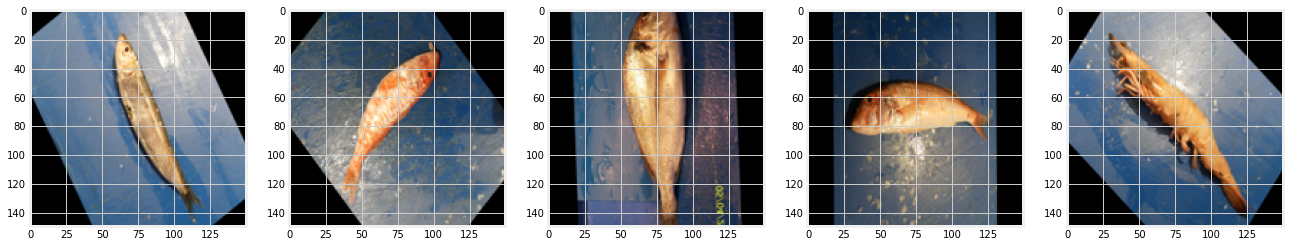

In [7]:
# Mostrando exemplares de imagens à serem mostradas para rede neural (as imagens são passadas para a rede neural em forma de matriz 3-dimensional) , como
# comentado anteriormente

plt.figure(figsize=(20,10))
coll = 5 
z = []

for i in range(coll):
  plt.subplot(5/coll + 1 , coll ,i+1)
  plt.imshow(X[len(z)])
  for i in range(1,2000):
    z.append(1)


In [8]:
xtr,xval,ytr,yval = train_test_split(X , y , test_size = .2 )
# Separando dados para treino e validação

In [9]:
# Image augmentation : transformando, rotaciondo , virando a imagem para evitar que a máquina se adeque aos formatos presente em nosso dataset,
# Através disso, forçamos um melhor aprendizado e generalização (capaz de identificar as classes independete de angulos de foto , por exemplo)


datagen = ImageDataGenerator(vertical_flip= True , horizontal_flip= True , rotation_range=40
                    , width_shift_range = .20 ,
                   height_shift_range = .20 , rescale =1./255 )



valdatagen = ImageDataGenerator(rescale= 1./255)

x = datagen.flow(xtr , ytr , batch_size= 32 , )
val = datagen.flow(xval , yval , batch_size= 32 )



Construindo Rede Neural Convolucional ( técnica utilizada para o aprendizado de local de imagens ) 




Através disso, certas camadas irão se 'especializar' a diferentes estruturas importantes para o nosso modelo de classificação.





A função MaxPooling2D funciona como uma redução de área, tomando o valor máximo presente em uma certa área de pixels (capturadas pelas camadas convolucionais). Com isso, a rede neural pode se especializar em estruturas específicas e consegue identificar estruturas importantes para a classificação.


A camada de BatchNormalization , 'normaliza'  os dados, reduzindo as distâncias entre o items enquanto mantêm a proporcionalidade entre os mesmos. Através disso, diminuimos o tempo de processamento e permitimos o aprendizado de caractéristicas similares mais rapidamente.

A camada Flatten permite o achatamento das matrizes (input de camadas anteriores) em uma longa matriz unidimensional.


As camadas finais, Dense Layers, são camadas inteiramente conectadas entre si, com pesos e viéses (coeficiente de inclinação e  coeficiente de intercepto de funções lineares)

A última camada, com ativação softmax e com 9 inputs, permite o output de  classificação do nosso modelo. O output dado são 9 valores (que refletem a probabilidade de nosso item pertencer a cada classe), como é probabilidade de  nosso item pertencer à cada categoria dá o valor 1 como soma (100%)





In [10]:
model = keras.models.Sequential()
model.add(layers.Conv2D(1024 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(604 , (3,3) , activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3) , activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dropout(.35))
model.add(layers.Dense(32 , activation= 'relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(9 , activation= 'softmax'))


model.compile( optimizer= 'rmsprop' , loss = 'sparse_categorical_crossentropy' , metrics = ['acc'] , )

In [12]:
size = len(X) *.8
sizev = len(X) * .2

keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
    )





hs = model.fit(x , validation_data= val , epochs = 20 , steps_per_epoch= size // 32 , validation_steps= sizev // 32 )

Epoch 1/20
200/200 [==============================] - 153s 696ms/step - loss: 2.3398 - acc: 0.2327 - val_loss: 4.3336 - val_acc: 0.2581
Epoch 2/20
200/200 [==============================] - 137s 684ms/step - loss: 1.4558 - acc: 0.4158 - val_loss: 1.7353 - val_acc: 0.3275
Epoch 3/20
200/200 [==============================] - 137s 682ms/step - loss: 1.2044 - acc: 0.5098 - val_loss: 23.3837 - val_acc: 0.3344
Epoch 4/20
200/200 [==============================] - 137s 683ms/step - loss: 0.9886 - acc: 0.6206 - val_loss: 9.4045 - val_acc: 0.2113
Epoch 5/20
200/200 [==============================] - 136s 681ms/step - loss: 0.9018 - acc: 0.6582 - val_loss: 1.0730 - val_acc: 0.6263
Epoch 6/20
200/200 [==============================] - 136s 682ms/step - loss: 0.7661 - acc: 0.7149 - val_loss: 3.0601 - val_acc: 0.4250
Epoch 7/20
200/200 [==============================] - 137s 683ms/step - loss: 0.7202 - acc: 0.7635 - val_loss: 2.5484 - val_acc: 0.4812
Epoch 8/20
200/200 [===========================

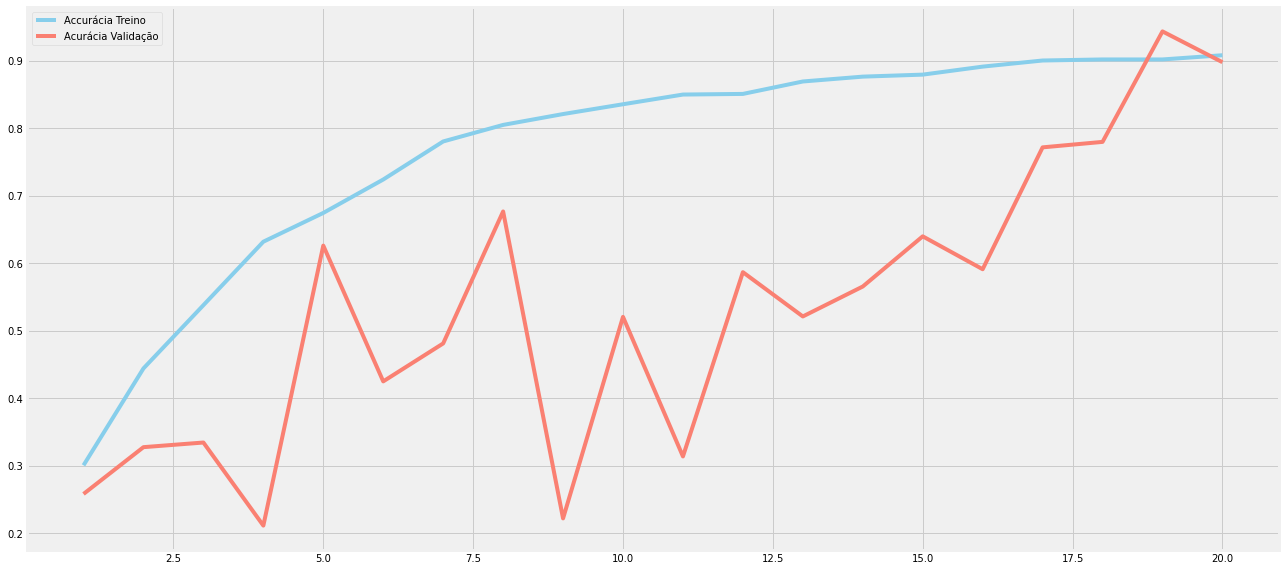

In [13]:
acc = hs.history['acc']
val_acc = hs.history['val_acc']

plt.figure(figsize=(20,10))
plt.plot(range(1,21) , acc , 'skyblue' , label = 'Accurácia Treino')
plt.plot(range(1,21) , val_acc , 'salmon' , label = 'Acurácia Validação')
plt.legend()
plt.show()

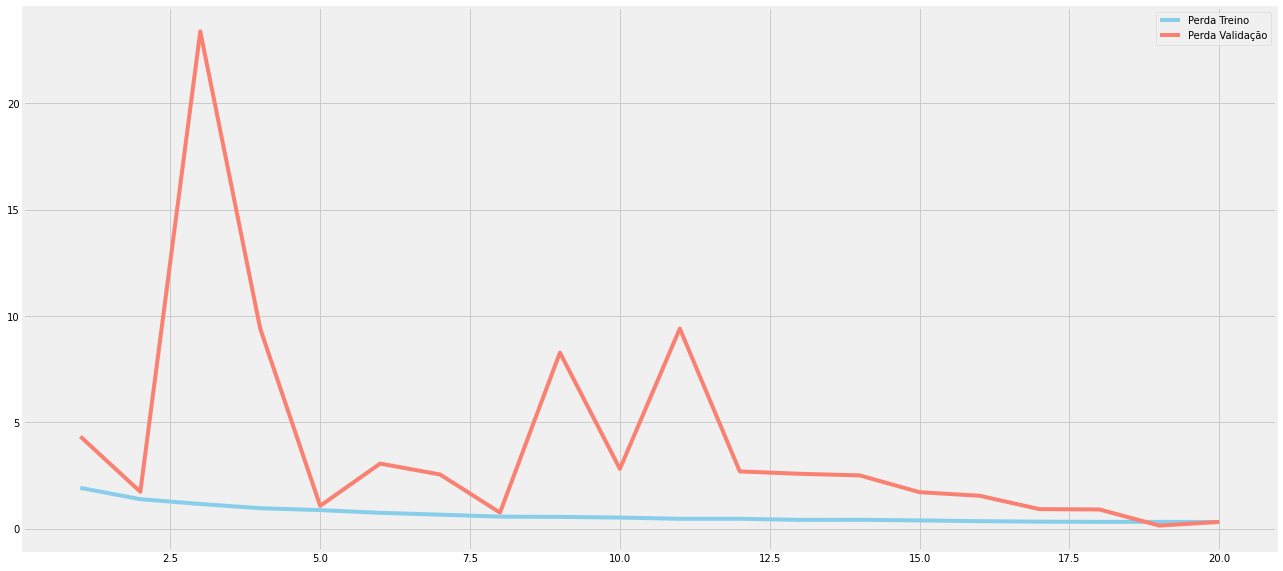

In [14]:
loss = hs.history['loss']
val_loss = hs.history['val_loss']

plt.figure(figsize=(20,10))
plt.plot(range(1,21) , loss , 'skyblue' , label = 'Perda Treino')
plt.plot(range(1,21) , val_loss , 'salmon' , label = 'Perda Validação')
plt.legend()
plt.show()

Predição do Nosso Modelo Treinado

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



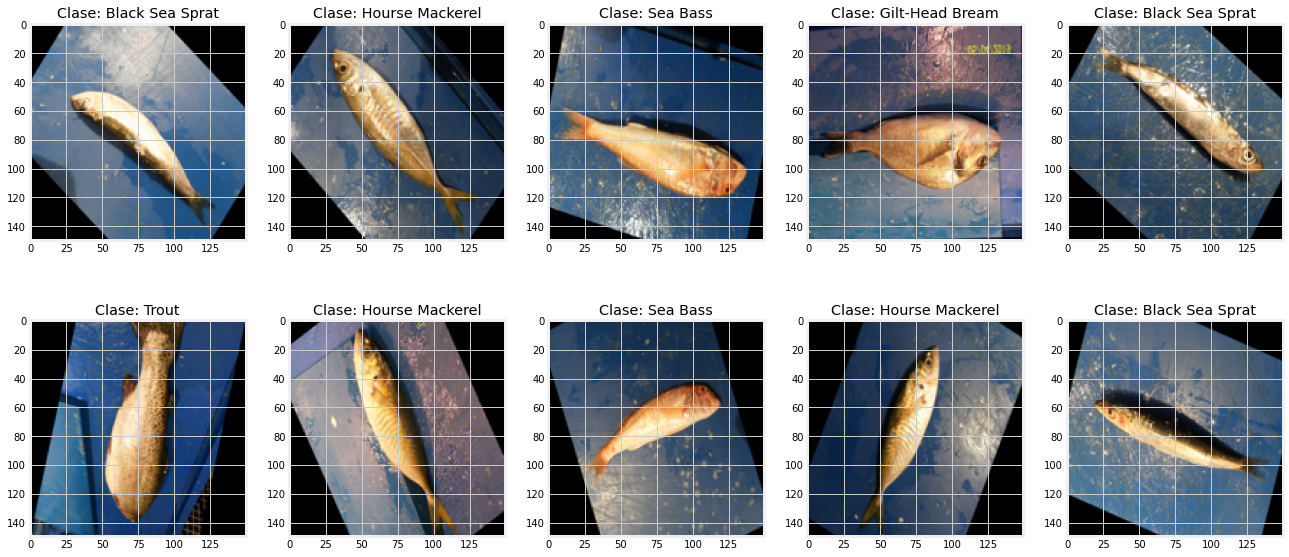

In [15]:
i = 0 
columns = 5 
text_labels = [] 


plt.figure(figsize= (20,10))

dados  = ImageDataGenerator(rescale= 1./255)



for batch in dados.flow(X, batch_size= 1 ):
  pred = model.predict_classes(batch) 
  if pred == 0:
    text_labels.append('Black Sea Sprat')
  elif pred == 1:
    text_labels.append('Red Mullet')
  elif pred == 2 :
    text_labels.append('Hourse Mackerel')
  elif pred == 3 :
    text_labels.append('Gilt-Head Bream')
  elif pred == 4 :
    text_labels.append('Trout')
  elif pred == 5 :
    text_labels.append('Sea Bass')
  elif pred == 6:
    text_labels.append('Striped Red Mullet')
  elif pred == 7:
    text_labels.append('Shrimp')

  
  plt.subplot(5 / columns + 1, columns, i + 1)
  plt.title('Clase: ' + text_labels[i])


  imgplot = plt.imshow(batch[0])
  i+= 1 
  if i % 10 == 0:
    break

plt.show()

In [18]:
model.save('modelfishclf.h5')
model.save_weights('modelwfishclf.h5')